In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
plt.rcParams['figure.figsize'] = [18, 10]  # установим размер картинок по умолчанию

# Задание 1
В файлике train.csv содержится информация о числе ридов с каждым из 4-ёх нуклеотидов по разным позициям (колонки A, T, G, C)).    
Постройте гистограмму распределения этих чисел.    
По x должны идти позиции (pos), а по y - частота для каждой из букв (stacked barplot)

In [114]:
reads_data = pd.read_csv("https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv")
reads_data

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


<function matplotlib.pyplot.show(*args, **kw)>

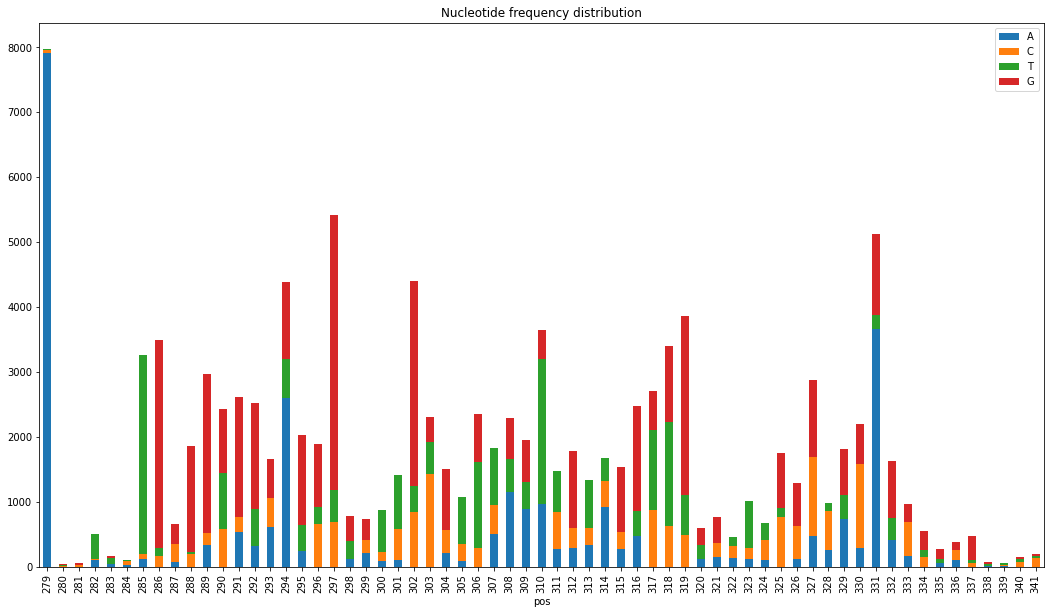

In [132]:
reads_data.plot.bar(x = "pos", y = ["A", "C", "T", "G"], stacked=True)
plt.title("Nucleotide frequency distribution")
plt.show

 # Задание 2
 Сохраните в файл train_part.csv следующую часть из файла train.csv:    
    - строки, где matches больше чем среднее    
    - колонки pos, reads_all, mismatches, deletions, insertions

Сначала отберем нужные строки:

In [116]:
reads_data["matches"].mean() # глянем сразу среднее, чтобы оценить потом, что фильтрация прошла правильно

4710.285714285715

In [117]:
reads_subset = reads_data.loc[reads_data["matches"] > reads_data["matches"].mean()] # фильтруем по условию

reads_subset.sort_values(by=["matches"]) # провеяем с сортировкой, первое значение больше среднего, все ок

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
33,312,8051,4745,1766,1556,159,294.0,308.0,NaN,1175.0,0.035579,NaN,0.145651,0.037627
17,296,8039,4870,1883,1308,50,NaN,657.0,261.0,966.0,NaN,0.032170,0.119298,0.081841
49,328,8059,4922,983,2163,197,256.0,608.0,123.0,NaN,0.031507,0.015213,NaN,0.074936
32,311,8051,5029,1479,1558,90,272.0,575.0,634.0,NaN,0.033311,0.078508,NaN,0.071593
34,313,8054,5037,1337,1687,66,329.0,274.0,733.0,NaN,0.040546,0.091010,NaN,0.033847
25,304,8051,5310,1492,1248,63,204.0,361.0,NaN,937.0,0.024770,NaN,0.115451,0.044953
26,305,8048,5360,1054,1641,36,91.0,265.0,714.0,NaN,0.010243,0.088662,NaN,0.032133
53,332,8057,5381,1619,1066,88,408.0,NaN,344.0,881.0,0.050222,0.041820,0.108997,NaN
19,298,8047,5939,769,1345,12,124.0,NaN,266.0,394.0,0.014754,0.032077,0.048882,NaN
22,301,8050,6135,1395,516,51,100.0,483.0,825.0,NaN,0.011395,0.102406,NaN,0.059618


Теперь отберем только те колонки, которые просят:

In [118]:
reads_subset_cols = reads_subset[["pos", "reads_all", "mismatches", "deletions", "insertions"]]
reads_subset_cols.head()

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241


In [119]:
reads_subset_cols.to_csv("train_part.csv", index=False) # сохраняем в файл

# Задание 3
Проведите Explorative Data Analysis какого-нибудь датасета. Как минимум нужны корреляции, графики распределений

In [120]:
series = pd.read_csv("friends_episodes_v2.csv") # датасет по сериалу Друзья
series.head(5)

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


Посмотрим количество строк и столбцов:

In [121]:
series.shape

(235, 8)

Посмотрим какие типы данных:

In [122]:
series.dtypes 

Year_of_prod       int64
Season             int64
Episode_Title     object
Duration           int64
Summary           object
Director          object
Stars            float64
Votes              int64
dtype: object

Поменяем тип данных у сезона:

In [123]:
series['Season'] = series['Season'].astype("object") 
series['Season'].dtypes 

dtype('O')

В этом датасете нет пропущенных значений:

In [124]:
series.isnull().sum()

Year_of_prod     0
Season           0
Episode_Title    0
Duration         0
Summary          0
Director         0
Stars            0
Votes            0
dtype: int64

Можно посмотреть статистику (максимум, минимум, среднее..)

In [125]:
series.describe()

,Year_of_prod,Duration,Stars,Votes
count,235.000000,235.000000,235.000000,235.000000
mean,1998.982979,22.340426,8.459574,3352.285106
std,2.831396,1.517372,0.397029,824.214570
min,1994.000000,22.000000,7.200000,2557.000000
25%,1997.000000,22.000000,8.200000,2885.500000
50%,1999.000000,22.000000,8.400000,3147.000000
75%,2001.000000,22.000000,8.700000,3579.500000
max,2004.000000,30.000000,9.700000,10381.000000


Написали функцию, которая построит распределение сразу для всех числовых признаков в датасете

In [196]:
def hists_for_number(data): 
    for col in data.select_dtypes(include='number'):
        sns.distplot(data[col], kde=False, hist_kws={"rwidth":0.9})
        plt.title(col + " distribution")
        plt.show()

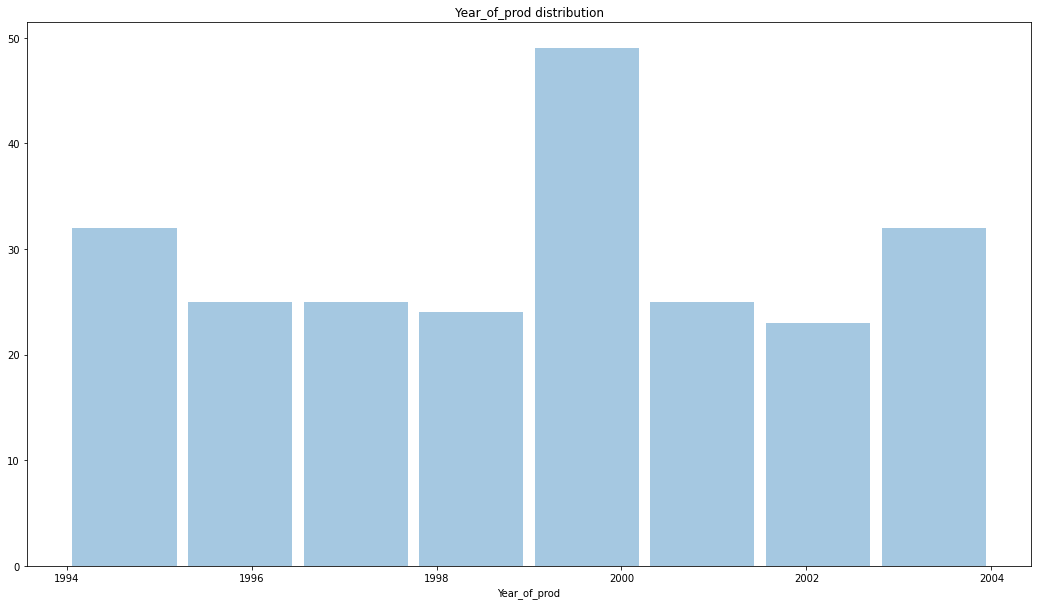

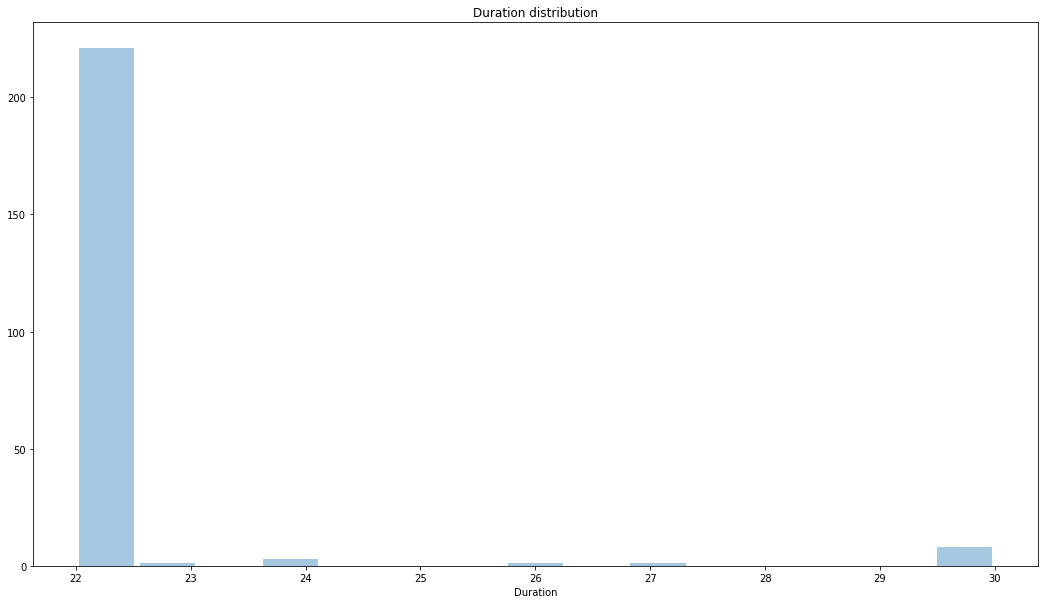

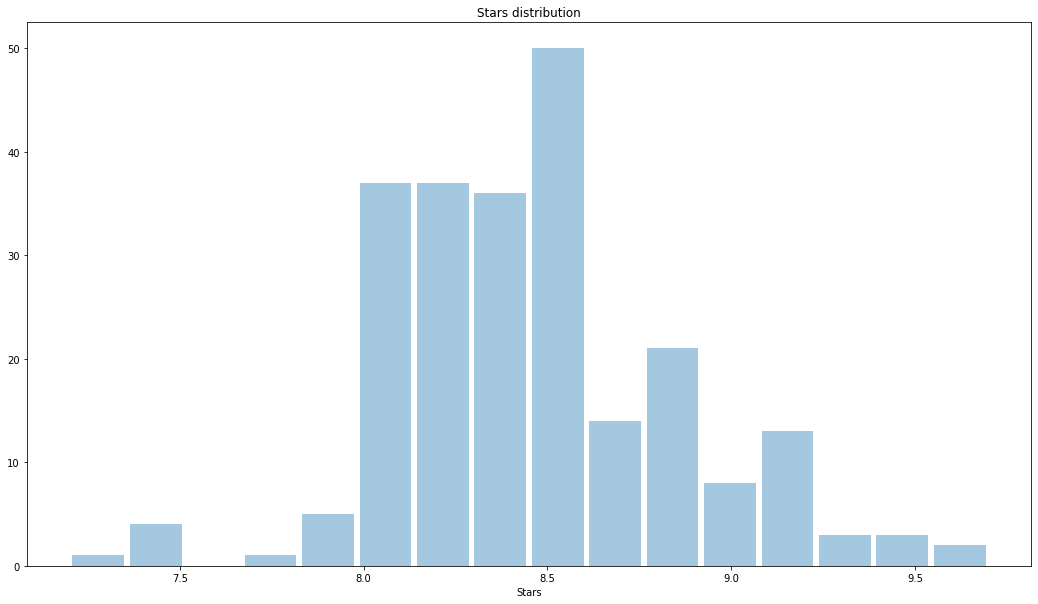

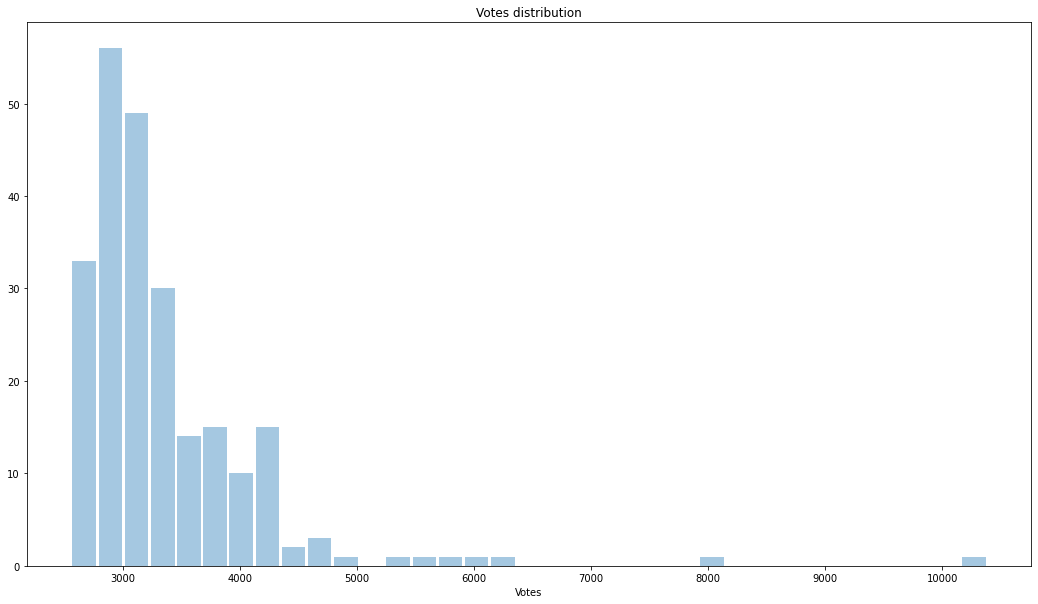

In [197]:
hists_for_number(series)

По переменным типа object пострим барплоты. Два директора ответственны за большинство вышедших серий:

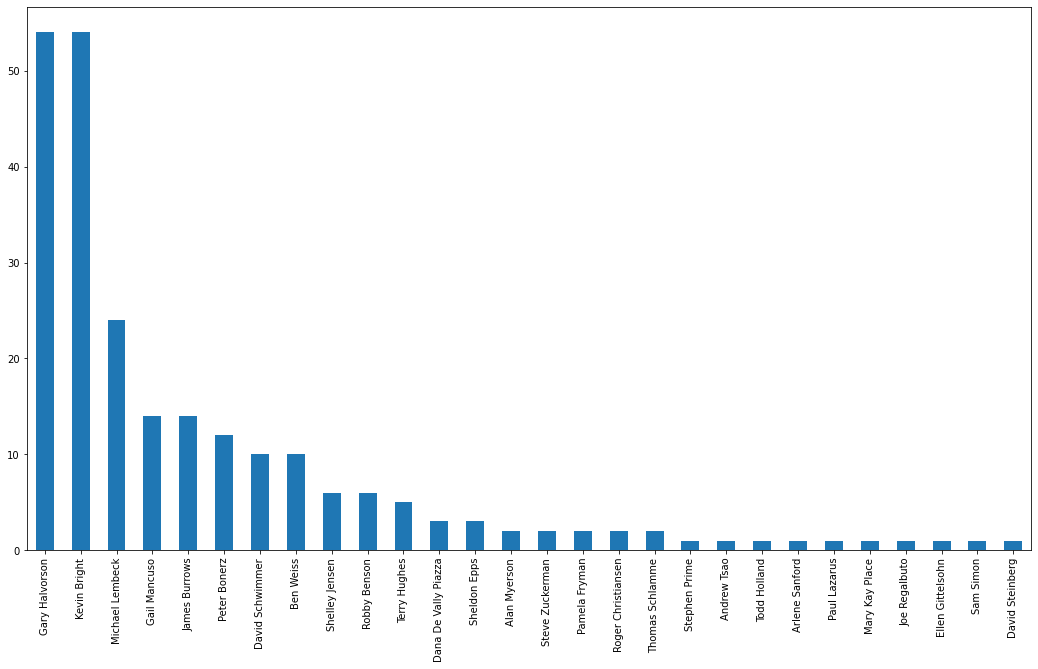

In [128]:
series["Director"].value_counts().plot.bar()

Больше всего серий в 3 и 6 сезонах, а в последнем меньше всего:

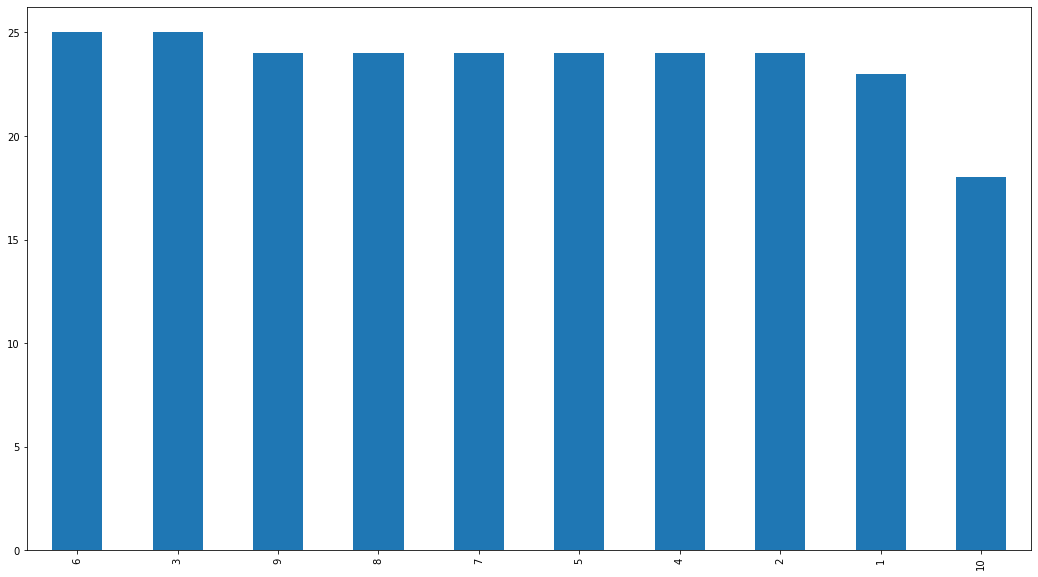

In [129]:
series["Season"].value_counts().plot.bar()

Посмотрим, какой сезон с самым большим числом голосов. Это первый сезон, а потом количество голосов падает, все как обычно)

In [154]:
votes_by_season = series.groupby("Season").Votes.sum().reset_index()
votes_by_season

,Season,Votes
0,1,95397
1,2,89014
2,3,86462
3,4,81441
4,5,82942
5,6,78827
6,7,70577
7,8,71609
8,9,66254
9,10,65264


Визуализируем это:

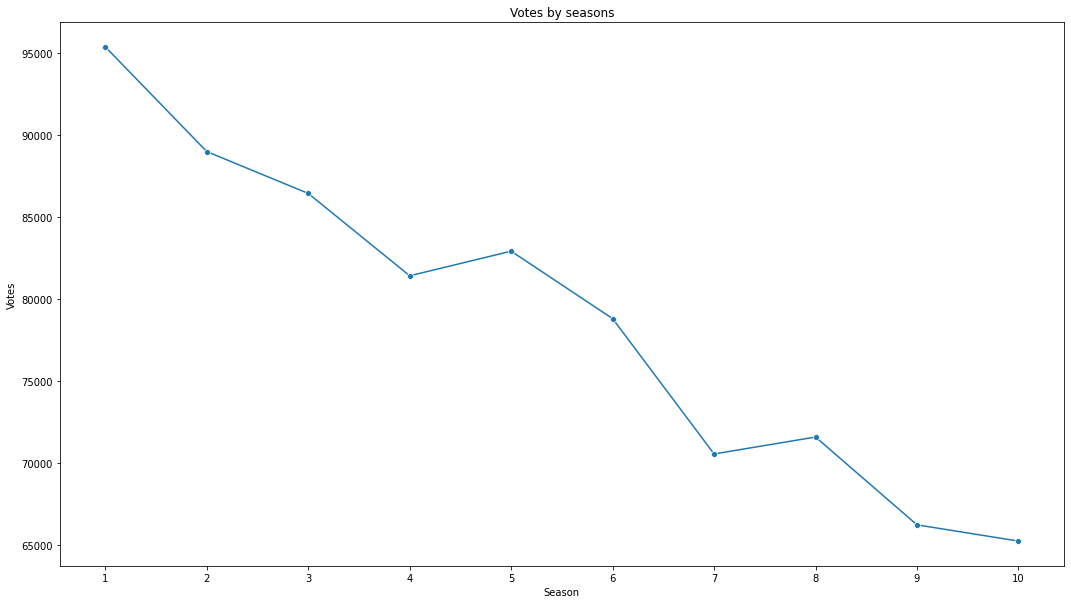

In [158]:
sns.lineplot(votes_by_season["Season"], votes_by_season["Votes"], data=votes_by_season, marker="o")
plt.xticks(np.arange(1,11,1))
plt.title("Votes by seasons")
plt.show()

Выведем названия 10 самых высокооцененных серий:

In [177]:
series[["Episode_Title","Stars"]].sort_values(by="Stars", ascending=False).head(10)

,Episode_Title,Stars
234,The Last One,9.7
109,The One Where Everybody Finds Out,9.7
233,The Last One,9.5
83,The One with the Embryos,9.5
36,The One with the Prom Video,9.4
177,The One with the Rumor,9.3
144,The One with the Proposal,9.3
172,The One with the Videotape,9.3
168,The One with Monica and Chandler's Wedding: Pa...,9.2
95,The One with Ross's Wedding,9.2


Серия с самым низким рейтингом:

In [180]:
series[series['Stars'] == series['Stars'].min()]

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
92,1998,4,The One with the Invitation,22,As Ross and Emily send out wedding invitations...,Peter Bonerz,7.2,3364


Построим корреляционную матрицу (берем спирмена, потому что распределение не везде нормальное):

In [186]:
corrMatrix = series.corr(method='spearman')
corrMatrix

,Year_of_prod,Duration,Stars,Votes
Year_of_prod,1.000000,0.224760,0.091208,-0.705917
Duration,0.224760,1.000000,0.127097,-0.041815
Stars,0.091208,0.127097,1.000000,0.434044
Votes,-0.705917,-0.041815,0.434044,1.000000


Визуализируем корреляцию хитмапом:

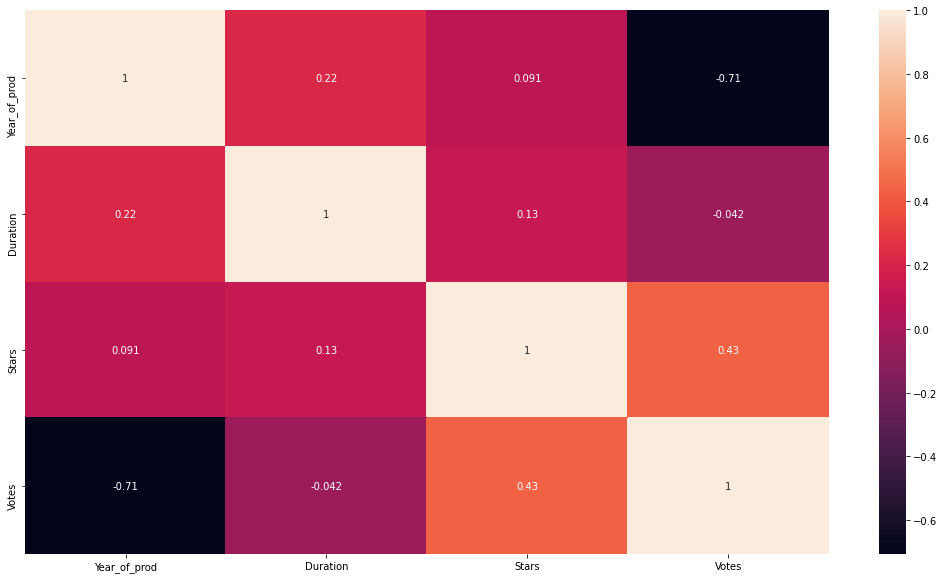

In [188]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Год выхода серии отрицательно коррелирует с количеством голосов, это согласуется с тем, что мы уже выяснили - серии, которые выходили раньше, собирали больше голосов. Еще немного положительно коррелирует рейтинг в звездах с количеством голосов, что логично. Остальные корреляции не значимы.